In [3]:
import mglearn
X, y = mglearn.datasets.make_forge()

X.shape:(26, 2)


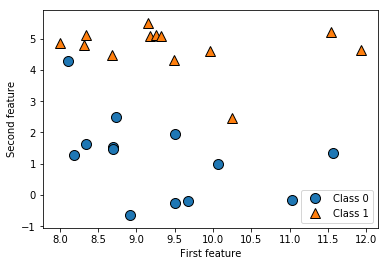

In [6]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test)

(19, 2) (19,)
(7, 2) (7,)
[1 1 0 0 1 0 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test)

(20, 2) (20,)
(6, 2) (6,)
[1 0 0 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test)

(20, 2) (20,)
(6, 2) (6,)
[1 1 0 0 1 0]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
y_test_hat = clf.predict(X_test)
print(y_test)
print(y_test_hat)

[1 0 1 0 1 1 0]
[1 0 1 0 1 0 0]


In [14]:
from sklearn.metrics import accuracy_score
y_train_hat = clf.predict(X_train)
print("train accuracy : ", accuracy_score(y_train, y_train_hat))
y_test_hat = clf.predict(X_test)
print("test accuracy : ", accuracy_score(y_test, y_test_hat))


train accuracy :  0.9473684210526315
test accuracy :  0.8571428571428571


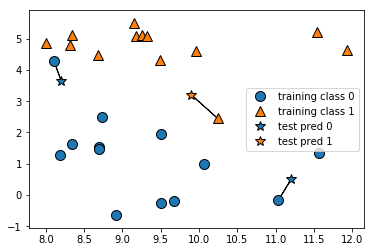

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

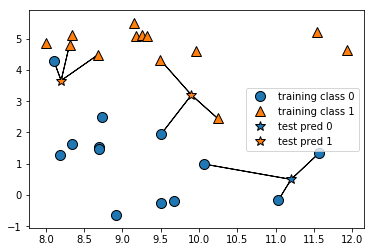

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

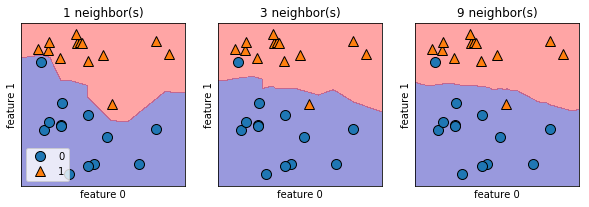

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)


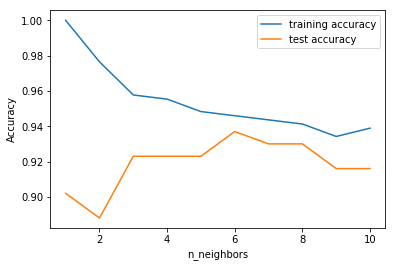

In [25]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 1. record training set accuracy
    # training_accuracy.append(clf.score(X_train, y_train))

    # 2. accuracy on the training set
    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    # 1. record generalization accuracy
    # test_accuracy.append(clf.score(X_test, y_test))
    
    # 2. accuracy on the test set (generalization)
    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

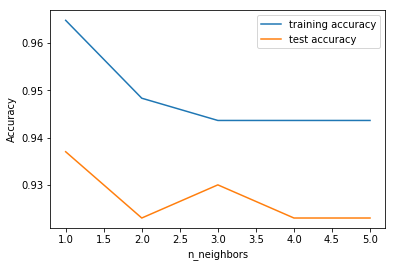

In [27]:
training_accuracy = []
test_accuracy = []
# try minkowski p from 1 to 5
p_settings = range(1, 6)

for p in p_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=p)
    clf.fit(X_train, y_train)
    
    # 1. record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

    # 2. accuracy on the training set
    # y_train_hat = clf.predict(X_train)
    # training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    # 1. record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
    # 2. accuracy on the test set (generalization)
    #y_test_hat = clf.predict(X_test)
    #test_accuracy.append(accuracy_score(y_test, y_test_hat))
    
plt.plot(p_settings, training_accuracy, label="training accuracy")
plt.plot(p_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
